In [4]:
import os
os.chdir('/home/dlhogan/GitHub/S3-precipitation-rodeo/')

In [5]:

import cmweather
import matplotlib.pyplot as plt
import xarray as xr
import pandas as pd
import geopandas as gpd
import json
from utils.get_sail_data import get_sail_data


nctoolkit is using Climate Data Operators version 2.4.4


In [6]:
import nctoolkit as nc
nc.deep_clean()

In [7]:
# Function to load ARM credentials
def load_arm_credentials(credential_path):
    with open(credential_path, 'r') as f:
        credentials = json.load(f)
    return credentials
# Location of ARM credentials
credential_path = '/home/dlhogan/.act_config.json'
credentials = load_arm_credentials(credential_path)
# api token and username for ARM
api_username = credentials.get('username')
api_token = credentials.get('token')

sail_datastream_dict = {
    "squire_radar": "gucxprecipradarsquireS2.c1",
}

In [8]:
winter_22 = ('20211201','20220331')
winter_23 = ('20221201','20230331')

In [9]:
winter_22_range = pd.date_range(start=winter_22[0], end=winter_22[1], freq='5D')
winter_23_range = pd.date_range(start=winter_23[0], end=winter_23[1], freq='5D')


In [10]:
# Set the location of the data folder where this data will be stored
winter_22_folder = 'winter_21_22'
winter_23_folder = 'winter_22_23'
 # change to location of data folder on your machine
storage_directory = f'/storage/dlhogan/synoptic_sublimation/'

In [11]:
# load in the winter 22 data
sail_winter_22_folder = os.path.join(storage_directory,'sail_data',winter_22_folder)
# create empty data dictionary
w22_data_loc_dict = {}
# Iterate through the dictionary and pull the data for each datastream
for i, date in enumerate(winter_22_range):
    if i == len(winter_22_range) - 1:
        break
    # Check if the file already exists
    if (os.path.exists(f"{sail_winter_22_folder}/{sail_datastream_dict['squire_radar']}_{date.strftime('%Y%m%d')}_{(date + pd.Timedelta('4D')).strftime('%Y%m%d')}.nc")): 
        print(f"{sail_datastream_dict['squire_radar']}_{date.strftime('%Y%m%d')}_{(date + pd.Timedelta('4D')).strftime('%Y%m%d')}.nc already exists")
        print('-------------------')
        # add the filename to the dictionary which can be used if we want to load the data
        w22_data_loc_dict[sail_datastream_dict["squire_radar"]] = os.path.join(sail_winter_22_folder,f"{sail_datastream_dict['squire_radar']}_{date.strftime('%Y%m%d')}_{(date + pd.Timedelta('4D')).strftime('%Y%m%d')}.nc")
        continue
    else:
        ds = get_sail_data(api_username,
                    api_token,
                    sail_datastream_dict["squire_radar"],
                    startdate=date.strftime('%Y%m%d'),
                    enddate=(date + pd.Timedelta('4D')).strftime('%Y%m%d'))
        if ds is None:
            print(f"No data for {sail_datastream_dict['squire_radar']}_{date.strftime('%Y%m%d')}_{(date + pd.Timedelta('4D')).strftime('%Y%m%d')}")
            print('-------------------')
            continue
        else:
            # resample to 1H mean
            ds = ds.resample(time='1H').mean()
            # drop lowest_height variable
            ds = ds.drop_vars('lowest_height')
            # save the dataset
            ds.to_netcdf(f"{sail_winter_22_folder}/{sail_datastream_dict['squire_radar']}_{date.strftime('%Y%m%d')}_{(date + pd.Timedelta('4D')).strftime('%Y%m%d')}.nc")
            # print that this file is completed
    print(f"File {i+1} of {len(winter_22_range)} completed")
        

gucxprecipradarsquireS2.c1_20211201_20211205.nc already exists
-------------------
gucxprecipradarsquireS2.c1_20211206_20211210.nc already exists
-------------------
gucxprecipradarsquireS2.c1_20211211_20211215.nc already exists
-------------------
gucxprecipradarsquireS2.c1_20211216_20211220.nc already exists
-------------------
gucxprecipradarsquireS2.c1_20211221_20211225.nc already exists
-------------------
gucxprecipradarsquireS2.c1_20211226_20211230.nc already exists
-------------------
No files returned or url status error for gucxprecipradarsquireS2.c1.
Check datastream name, start, and end date.
No data for gucxprecipradarsquireS2.c1_20211231_20220104
-------------------
gucxprecipradarsquireS2.c1_20220105_20220109.nc already exists
-------------------
gucxprecipradarsquireS2.c1_20220110_20220114.nc already exists
-------------------
gucxprecipradarsquireS2.c1_20220115_20220119.nc already exists
-------------------
gucxprecipradarsquireS2.c1_20220120_20220124.nc already exists

In [12]:
# load in the winter 23 data
sail_winter_23_folder = os.path.join(storage_directory,'sail_data',winter_23_folder)
# create empty data dictionary
w23_data_loc_dict = {}
# Iterate through the dictionary and pull the data for each datastream
for i, date in enumerate(winter_23_range):
    if i == len(winter_23_range) - 1:
        break
    # Check if the file already exists
    if (os.path.exists(f"{sail_winter_23_folder}/{sail_datastream_dict['squire_radar']}_{date.strftime('%Y%m%d')}_{(date + pd.Timedelta('4D')).strftime('%Y%m%d')}.nc")): 
        print(f"{sail_datastream_dict['squire_radar']}_{date.strftime('%Y%m%d')}_{(date + pd.Timedelta('4D')).strftime('%Y%m%d')}.nc already exists")
        print('-------------------')
        # add the filename to the dictionary which can be used if we want to load the data
        w23_data_loc_dict[sail_datastream_dict["squire_radar"]] = os.path.join(sail_winter_23_folder,f"{sail_datastream_dict['squire_radar']}_{date.strftime('%Y%m%d')}_{(date + pd.Timedelta('4D')).strftime('%Y%m%d')}.nc")
        continue
    else:
        ds = get_sail_data(api_username,
                    api_token,
                    sail_datastream_dict["squire_radar"],
                    startdate=date.strftime('%Y%m%d'),
                    enddate=(date + pd.Timedelta('4D')).strftime('%Y%m%d'))
        if ds is None:
            print(f"No data for {sail_datastream_dict['squire_radar']}_{date.strftime('%Y%m%d')}_{(date + pd.Timedelta('4D')).strftime('%Y%m%d')}")
            print('-------------------')
            continue
        else:
            # resample to 1H mean
            ds = ds.resample(time='1H').mean()
            # drop lowest_height variable
            ds = ds.drop_vars('lowest_height')
            # save the dataset
            ds.to_netcdf(f"{sail_winter_23_folder}/{sail_datastream_dict['squire_radar']}_{date.strftime('%Y%m%d')}_{(date + pd.Timedelta('4D')).strftime('%Y%m%d')}.nc")
            # print that this file is completed
    print(f"File {i+1} of {len(winter_23_range)} completed")
        

gucxprecipradarsquireS2.c1_20221201_20221205.nc already exists
-------------------
gucxprecipradarsquireS2.c1_20221206_20221210.nc already exists
-------------------
gucxprecipradarsquireS2.c1_20221211_20221215.nc already exists
-------------------
gucxprecipradarsquireS2.c1_20221216_20221220.nc already exists
-------------------
gucxprecipradarsquireS2.c1_20221221_20221225.nc already exists
-------------------
gucxprecipradarsquireS2.c1_20221226_20221230.nc already exists
-------------------
gucxprecipradarsquireS2.c1_20221231_20230104.nc already exists
-------------------
gucxprecipradarsquireS2.c1_20230105_20230109.nc already exists
-------------------
gucxprecipradarsquireS2.c1_20230110_20230114.nc already exists
-------------------
gucxprecipradarsquireS2.c1_20230115_20230119.nc already exists
-------------------
gucxprecipradarsquireS2.c1_20230120_20230124.nc already exists
-------------------
gucxprecipradarsquireS2.c1_20230125_20230129.nc already exists
-------------------
gucx

In [13]:
squire_ds = xr.open_mfdataset('/storage/dlhogan/synoptic_sublimation/sail_data/winter_22_23/gucxprecipradarsquireS2.c1_*.nc')

In [14]:
wbucket_ds = xr.open_dataset('/storage/dlhogan/synoptic_sublimation/sail_data/winter_22_23/pluvio2_20221001_20230930.nc')

In [15]:
gauge_lat = wbucket_ds.lat.values[0]
gauge_lon = wbucket_ds.lon.values[0]

upper_east_river = gpd.read_file('./01_data_preparation/geodata/upper_east_river.json', driver='GeoJSON').to_crs(epsg=4326)
east_taylor_river = gpd.read_file('./01_data_preparation/geodata/east_taylor.json', driver='GeoJSON').to_crs(epsg=4326)

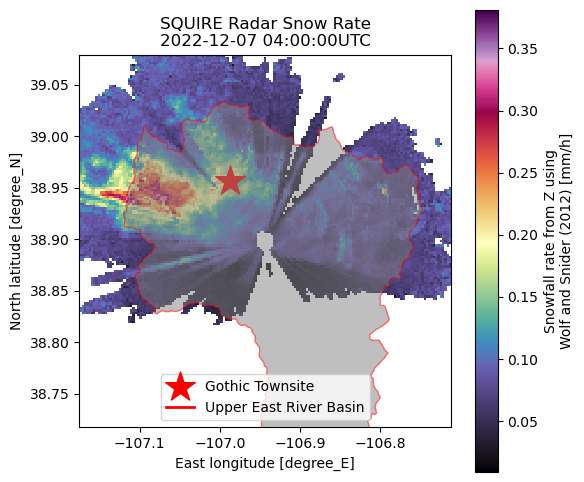

In [28]:
fig, ax = plt.subplots(figsize=(6,6))
squire_ds.snow_rate_ws2012.isel(time=100).plot(x='lon',
                                y='lat',
                                cmap='ChaseSpectral', ax=ax);
ax.scatter(gauge_lon,
            gauge_lat,
            color='r',
            marker='*',
            s=500,
            label='Gothic Townsite');
# upper_east_river.plot(ax=ax, color='none', edgecolor='red', lw=2)
ax.plot([],[], color='red', label='Upper East River Basin', lw=2)
east_taylor_river[east_taylor_river.index==1].plot(ax=plt.gca(), color='grey', edgecolor='red', alpha=0.5)
ax.legend(loc='lower center')
ax.set_title('SQUIRE Radar Snow Rate\n2022-12-07 04:00:00UTC');

In [39]:
if "lat" not in squire_ds.dims:
    squire_ds = squire_ds.swap_dims({'y': 'lat',
                                     'x': 'lon'})

In [40]:
squire_at_gauge = squire_ds.sel(lat=gauge_lat,
                                lon=gauge_lon,
                                method='nearest')

In [41]:
color_dict = {"snow_rate_ws88diw": "tab:green",
              "snow_rate_m2009_1": "tab:orange",
              "snow_rate_m2009_2": "tab:blue",
              "snow_rate_ws2012": "tab:red"}

In [42]:
df = pd.read_csv('./01_data_preparation/precipitation/w23_all_precip_30min.csv', index_col=0, parse_dates=True)
df = df.resample('1H').sum()
df.index = pd.to_datetime(df.index)

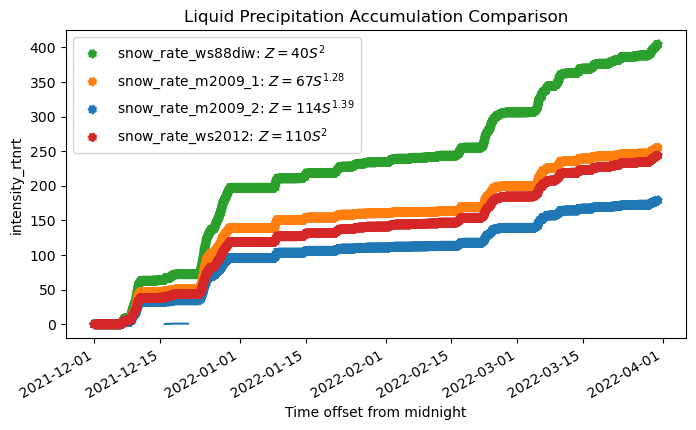

In [26]:
fig = plt.figure(figsize=(8,4))
ax = plt.subplot(111)

# Plot the 30-minute time of interest
wbucket_ds_sel.intensity_rtnrt.resample(time='1H').mean().cumsum().plot(ax=ax)
# df.cumsum().plot(ax=ax)

# Plot each Z(S) relationship as a horizontal line
for variable in list(squire_at_gauge.variables):
    if "snow_rate" in variable:
        z_s = f"{variable}: $Z = {squire_ds[variable].A}S^" + "{" + f"{squire_ds[variable].B}" + "}$"
        resampled_squire = squire_at_gauge[variable].resample(time='1H').mean().cumsum()
        ax.scatter(pd.to_datetime(resampled_squire.time),
                   resampled_squire,
                   label=z_s,
                   color=color_dict[variable],
                   linestyle=":")

plt.legend(loc='upper left')
plt.title("Liquid Precipitation Accumulation Comparison");

In [45]:
snow_rate_vars = [v for v in list(squire_at_gauge.variables) if "snow_rate" in v]
squire_at_gauge[snow_rate_vars].to_dataframe().drop(columns=['lat', 'lon', 'x', 'y']).to_csv('./01_data_preparation/precipitation/w23_squire_snow_rates.csv')
